# Projeto 2 - T320 (1S2024)


### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão aceitas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Questões copiadas de outros grupos serão anuladas em todos os grupos com a mesma resposta.
7. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Substitua os nomes que já estão no campo abaixo.
8. Você pode consultar todo o material de aula.
9. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
10. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

### 1) Exercício sobre regressão com MLP para aproximação de FDPs desconhecidas.

Em diversas áreas, inclusive em telecomunicações, podemos encontrar, em determinados problemas, variáveis aleatórias que não possuem formas conhecidas para suas funções densidade de probabilidade (FDP). Nestes casos, podemos recorrer à aproximação de funções como uma forma de encontrar uma função que aproxime os valores observados desta variável aleatória. Portanto, neste exercício, você deve encontrar uma função que aproxime os dados observados de uma variável aleatória.

1. As observações da variável aleatória com FDP desconhecida são geradas com o trecho de código abaixo. Portanto, execute código abaixo e analise o resultado.

**Dicas**

+ Sempre que possível, usem a semente (`seed`) definida na célula de código abaixo.
+ Este exercício consume muita memória RAM. Portanto, para que você não encontre problemas durante sua execução, use o Google Colab.

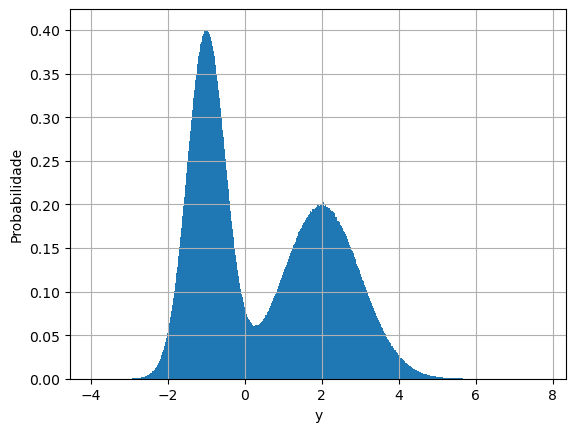

X.shape: (10000, 1)
y.shape: (10000,)


In [1]:
# Importando todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.integrate import quad

# Reset do gerador de sequências pseudo-aleatórias.
seed = 42
np.random.seed(seed)

# Número de amostras.
N = 100000000

# Distribuição Normal a.
mu_a = -1      # Média de a.
sigma_a = 0.5  # Desvio padrão de a.

# Distribuição Normal b.
mu_b = 2       # Média de b.
sigma_b = 1    # Desvio padrão de b.

# Distribuição Bimodal.
h = np.c_[sigma_a*np.random.randn(1, N) + mu_a, sigma_b*np.random.randn(1, N) + mu_b]
h = h.reshape(2*N,)

# Número de divisões do histograma.
bins = 10000
y, X, p = plt.hist(h, bins=bins, density=True)
plt.ylabel('Probabilidade')
plt.xlabel('y')
plt.grid()
plt.show()

# Redimensionando o vetor de atributos.
X = X[0:len(X)-1].reshape(bins,1)

# Imprimindo as dimensões.
print('X.shape:', X.shape)
print('y.shape:', y.shape)

2. Divida o conjunto total de amostras em conjuntos de treinamento e validação. Use 90% para treinamento e 10% para validação. Use a semente definida no item 1 para configurar o parâmetro `random_state` da função `train_test_split`.

In [2]:
# Digite aqui o código do exercício.

3. Use busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para treinar um objeto da classe `MLPRegressor` e encontrar os valores ideais para alguns parâmetros da rede MLP de tal forma que o modelo aproxime a PDF.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de parâmetros de um modelo, neste caso, os parâmetros do objeto da classe `MLPRegressor`, mas poderia ser de qualquer outro modelo que necessite de ajuste de seus parâmetros. O dicionário de parâmetros que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `MLPRegressor` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPRegressor` com todas as combinações possíveis dos parâmetros passados no dicionário e retornar, ao final, a melhor combinação destes parâmetros, ou seja, o conjunto de valores que resulta na maior pontuação.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPRegressor` configure o parâmetro de entrada `max_iter` com o valor 1000.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de camadas escondidas, (ii) o número ideal de nós em cada camada escondida, (iii) a função de ativação ideal dos nós, (iv) o melhor otimizador e (v) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `()`, `(10,)`, `(10,5)`, `(10,5,3)` e `(20,10,5,3)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'` e `'relu'`.
    * `'solver'` com os valores `'lbfgs'`, `'sgd'` e `'adam'`. 
    * `'random_state'` com os valores `1`, `13`, `43`, `62`, `109` e `281`.
+ O treinamento pode ser demorado, então pegue um café e tenha paciência.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure o número de folds para o k-Fold igual a 5, ou seja, `cv=5` e a pontuação como sendo o negativo do EQM, ou seja, `scoring='neg_mean_squared_error'`.
+ Para que o código de alguns itens funcione corretamente, use `reg` como o nome para a instância do objeto da classe `GridSearchCV`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [1]:
# Digite aqui o código do exercício.

4. Após o treinamento, imprima quais foram os melhores valores encontrados pela busca em gride (i.e., grid search).

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [2]:
# Digite aqui o código do exercício.

5. Qual é o erro quadrático médio (EQM) da rede MLP nos conjuntos de treinamento e validação?

In [3]:
# Digite aqui o código do exercício.

6. Apresente uma figura comparando a predição feita pela MLP com os dados originais. Use o conjunto total de amostras geradas no item 1 para plotar a figura.

**DICAS**:

+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [4]:
# Digite aqui o código do exercício.

7. Analise os erros quadráticos médios (EQMs) calculados para os conjuntos de treinamento e validação e a figura do item anterior. Este modelo está sobreajustando, subajustando ou encontrou um balanço entre complexidade e capacidade de generalização? (**Justifique sua resposta**)

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

8. Execute a célula de código abaixo. Ela calcula a probabilidade entre o intervalo -2 a 0 usando o histograma normalizado e a aproximação com a MLP.

**DICAS**

+ Para que o código abaixo funcione corretamente, você deve ter usado `reg` como o nome para a instância do objeto da classe `GridSearchCV` criado no item 3 deste exercício.

In [7]:
a = -2  # Limite inferior do intervalo
b = 0   # Limite superior do intervalo

def pdfFunction(x):
    x = np.array([x]).reshape(1,1)
    return reg.predict(x)

def riemannSum(X, y, a, b):
    '''Função que implementa a soma de Riemann'''
    mask = (X >= a) & (X <= b)
    x_interval = X[mask]
    y_interval = y[mask.reshape(len(y),)]
    prob = 0
    for i in range(len(x_interval)-1):
        delta = x_interval[i+1]-x_interval[i]
        prob += y_interval[i]*delta
    return prob

# Calcula a probabilidade integrando a função de densidade de probabilidade sobre o intervalo [a, b]
prob_mlp, _ = quad(pdfFunction, a, b)

prob_hist = riemannSum(X, y, a, b)

print("Probabilidade no intervalo [a, b] aproximada com a MLP:", prob_mlp)
print("Probabilidade no intervalo [a, b] aproximada com o histograma normalizado:", prob_hist)

Probabilidade no intervalo [a, b] aproximada com a MLP: 0.4885476573589782
Probabilidade no intervalo [a, b] aproximada com o histograma normalizado: 0.4884988049999996


9. Após analisar os resultados do item anterior, pode-se concluir que a rede MLP encontrou uma boa aproximação para a FDP e que pode ser utilizada para se calcular a probabilidade da variável aleatória com FDP desconhecida? (**Justique sua resposta.**)

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

### 2) Exercício sobre classificação multiclasses.

Neste exercício, iremos comprarar a classificação softmax com a MLP para o conjunto de dados dos dígitos escritos à mão. O conjunto é composto por 1797 imagens com 8x8 pixels cada.

1. Execute a célula de código abaixo e veja algumas das imagens deste conjunto de dados. A figura mostra as 10 primeiras imagens do conjunto dos dígitos escritos à mão.

**DICAS**

+ Note que na célula abaixo, o conjunto de dados já é dividido em conjuntos de treinamento e teste e na sequência, os atributos são padronizados.

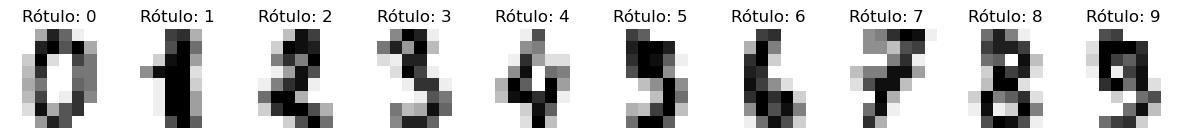

In [11]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

# Loading handwritten digits dataset.
X, y = load_digits(return_X_y=True)

# Pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Scale data to have zero mean and unit variance.
scaler = MinMaxScaler((-1,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot some of the images.
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 2))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Rótulo: {label}")

2. Execute a célula abaixo e analise o histograma gerado. Ele mostra a quantidade de exemplos em cada classe. Perceba que elas estão praticamente balanceadas, sendo a diferença entre elas bem pequena. Portanto, considerando que todas as classes estão balanceadas, qual métrica podemos usar para avaliar o desempenho geral de um classificador?

**DICA**

+ Reveja a parte V de classificação.

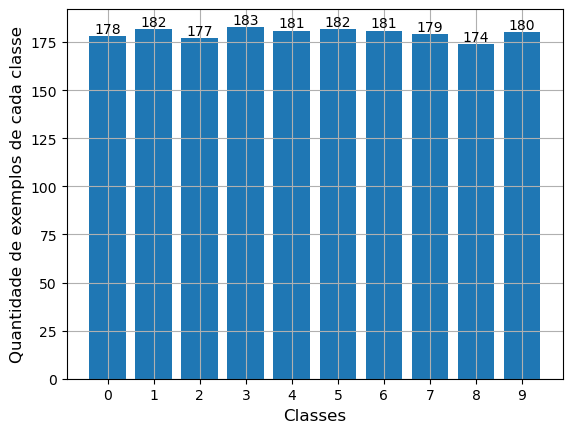

In [2]:
# Plota histograma com a quantidade de exemplos por classe.
fig, ax = plt.subplots()
bars = ax.bar([str(i) for i in range(10)], [len(y[y==i]) for i in range(10)])
ax.bar_label(bars)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Quantidade de exemplos de cada classe', fontsize=12)
plt.grid()
plt.show()

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

3. Treine um regressor **softmax** com o conjunto de treinamento.

**DICAS**:

+ Use um objeto da classe `LogisticRegression` com o parâmetro `multi_class` configurado com a string `'multinomial'`.
+ Use a semente (seed) definida no item 1 deste exercício para configurar o parâmetro `random_state` da classe `LogisticRegression`.
+ Configure o parâmetro `max_iter` da classe `LogisticRegression` com o valor 1000, i.e., `max_iter=1000`.
+ O restante dos parâmetros da classe devem ser configurados com seus valores padrão.

In [5]:
# Digite aqui o código do exercício.

4. Calcule e imprima a acurácia do regressor softmax para os conjuntos de treinamento e teste.

In [6]:
# Digite aqui o código do exercício.

5. Plote a matriz de confusão do regressor **softmax** para os exemplos do **conjunto de teste**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).

In [7]:
# Digite aqui o código do exercício.

6. Use busca exaustiva (`GridSearchCV`) e o conjunto de treinamento para treinar um objeto da classe `MLPClassifier` para encontrar os valores ideais para alguns parâmetros da rede MLP de tal forma que o modelo classifique o conjunto de dados.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure o parâmetro de entrada `max_iter` com o valor 1000.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós na(s) camada(s) escondida(s), (ii) a função de ativação ideal dos nós, (iii) o solver e (iv) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `()`, `(20,)`, `(30,)`, `(60,30)`, `(80,40)`, `(100,50)`, e `(200,100)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'`, e `'relu'`.
    * `'solver'`  com os valores `'lbfgs'` e `'adam'`.
    * `'random_state'`  com os valores `0`, `1`, `42`, `51`, `69`, `71`, `89`, e `103`.
+ Para agilizar o treinamento, configure o parâmetro `n_jobs` da classe `GridSearchCV` com o valor `-1`, ou seja, `n_jobs=-1`.
+ Ao instanciar o objeto da classe `GridSearchCV`, use um número de folds para o k-Fold igual a 5, ou seja, `cv=5`.
+ Configure o parâmetro `scoring` da classe `GridSearchCV` com a string `accuracy` , i.e., `scoring='accuracy'`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ O treinamento pode ser demorado, então pegue um café e tenha paciência. 

In [8]:
# Digite aqui o código do exercício.

7. Após o treinamento, imprima quais foram os melhores valores encontrados pelo grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [9]:
# Digite aqui o código do exercício.

8. Calcule e imprima a acuária da rede MLP para os conjuntos de treinamento e teste.

In [10]:
# Digite aqui o código do exercício.

9. Plote a matriz de confusão da rede MLP para os exemplos do **conjunto de teste**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).

In [11]:
# Digite aqui o código do exercício.

10. Observando a matriz de confusão e a acurácia, responda:

+ Qual dos dois modelos apresenta o melhor desempenho?
+ Você consegue explicar um possível motivo para esta diferença?

**Justifique as respostas**

**DICAS**

+ Um regressor softmax é similar a uma rede MLP com uma única camada, a de saída, com um número de nós igual ao número de classes do problema.
+ Por outro lado, uma rede MLP pode ter um número arbitrário de camadas escondidas, além da camada de saída, tornando-a mais flexível.
+ Reveja a parte II de redes neurais.

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

### 3) Exercício sobre o uso da rede MLP para predizer o consumo de combustível.

Este exercício usará a base de dados Auto MPG (https://archive.ics.uci.edu/dataset/9/auto+mpg) para construir um modelo de regressão com uma rede MLP que prediga o consumo de combustível de automóveis do final dos anos 1970, início dos anos 1980. A base de dados fornece a descrição de vários automóveis desse período. Essa descrição possui as seguintes colunas: 

+ número de cilindros (`Cylinders`), 
+ cilindrada do motor, em litros (`Displacement`), 
+ potência do motor (`Horsepower`), 
+ peso (`Weight`), 
+ aceleração (`Acceleration`), 
+ ano de fabricação do modelo (`Model Year`),
+ origem do modelo (`Origin`) e
+ consumo de combustível em milhas por galão (`MPG`).

A coluna `MPG` será o valor alvo (i.e., os rótulos). Lembrando que os rótulos são os valores que o modelo é treinado para predizer.

1. Execute a célula abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.
+ O conjunto já é dividido em conjuntos de treinamento e teste.
+ Observe a quantidade de exemplos nos dois conjuntos.

In [36]:
# Importe todas as bibliotecas necessárias.
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Usando pandas para ler a base de dados.
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv('https://www.dropbox.com/scl/fi/h4xx594a6iwda6z3e2o9u/auto-mpg.data?rlkey=dwydosez1l4cmsn5bn6iwqpbi&st=rldhyqvu&dl=1', names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()

# Removendo as linhas com valores desconhecidos.
dataset = dataset.dropna()

# A coluna "Origin" é uma coluna categórica e não numérica. Logo, a convertemos para one-hot.
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

# Separando os dados em um conjunto de treinamento e outro de teste.
# São separados 80% para treinamento e 20% para validação.
X_train = dataset.sample(frac=0.8,random_state=0)
X_test = dataset.drop(X_train.index)

# Separando o valor alvo (rótulos) dos atributos. Os rótulos são os valores que o modelo é treinado para predizer.
y_train = X_train.pop('MPG')
y_test = X_test.pop('MPG')

# Imprimindo as dimensões do conjunto de treinamento.
print('Dimensões de X_train:', X_train.shape)
print('Dimensões de y_train:', y_train.shape)

# Imprimindo as dimensões do conjunto de treinamento.
print('\nDimensões de X_test:', X_test.shape)
print('Dimensões de y_test:', y_test.shape)

# Mostrando os primeiro cinco exemplos.
dataset.tail()

Dimensões de X_train: (314, 9)
Dimensões de y_train: (314,)

Dimensões de X_test: (78, 9)
Dimensões de y_test: (78,)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


2. Padronize os conjuntos de treinamento e de teste.

**DICAS**:

+ Use a classe `StandardScaler` para padronizar os dados.
+ Lembre-se que os parâmetros de padronização (ou seja, média e variância) são obtidos a partir do conjunto de treinamento e apenas aplicados ao conjunto de teste. Veja o exemplo abaixo:
```python
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```
O método `fit_transform` calcula a média e o desvio padrão usando o conjunto de treinamento e padroniza o conjunto. O método `transform` usa a média e o desvio padrão calculados com o conunto de treinamento e padroniza o conjunto de teste. 

In [12]:
# Digite aqui o código do exercício.

3. Use busca exaustiva (i.e., um objeto da classe `GridSearchCV`) e o conjunto de treinamento para encontrar os valores ideais para alguns parâmetros de uma rede MLP para regressão (i.e., um objeto da classe `MLPRegressor`).

**DICAS**:

+ Ao instanciar o objeto da classe `MLPRegressor` configure o parâmetro `max_iter` com o valor 2000, ou seja, `max_iter=2000`.

+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós na(s) camada(s) escondida(s), (ii) a função de ativação ideal dos nós, (iii) o solver, (iv) o valor inicial do passo de aprendizagem e (v) o valor da semente do gerador de sequências pseudo-aleatórias.

+ O `GridSearchCV` deve testar o seguinte conjunto de parâmetros e valores da rede MLP:
    * `'hidden_layer_sizes'` com os valores `(16,)`, `(32,)`, `(64,)`, `(16,16)`, `(32,32)`, e `(64,64)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'`, e `'relu'`.
    * `'solver'`  com os valores `'lbfgs'` e `'adam'`.
    * `'learning_rate_init'` com os valores `0.001`, `0.003`, `0.01`, e `0.03`.
    * `'random_state'`  com os valores `0`, `3`, `42`, e `51`.

+ Ao instanciar o objeto da classe `GridSearchCV`, configure o número de folds para o k-Fold igual a 3, ou seja, `cv=3` e a pontuação como sendo o negativo do EQM, ou seja, `scoring='neg_mean_squared_error'`.

+ Para agilizar o treinamento, configure o parâmetro `n_jobs` da classe `GridSearchCV` com o valor `-1`, ou seja, `n_jobs=-1`.

+ O treinamento será demorado, então pegue um café e tenha paciência. 

+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [13]:
# Digite aqui o código do exercício.

4. Após o treinamento, imprima quais foram os melhores valores encontrados pelo grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [14]:
# Digite aqui o código do exercício.

5. Calcule e imprima o erro quadrático médio (MSE) para os conjuntos de treinamento e de teste.

**DICAS**:

+ Use a função `mean_squared_error` da biblioteca SciKit-Learn.

In [15]:
# Digite aqui o código do exercício.

6. Plote o histograma do erro entre os valores preditos pela rede MLP e os rótulos. Além disso, calcule e imprima a média e a variância do erro.

**DICAS**:

+ Use o conjunto de validação para plotar o histograma.
+ Use a função `hist` da biblioteca Matplotlib. Configure o parâmetro `bins` da função com o valor 25, ou seja, `bins=25`.
+ A documentação da função `hist` pode ser encontrada em:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [16]:
# Digite aqui o código do exercício.

7. Após observar o histograma, responda:

+ Ao redor de qual valor está a maior parte dos erros?

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

8. Quais ações poderiam ser realizadas para reduzir o erro do modelo de regressão?

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>